# CS166 Session 7.1 PCW 

## The Ising Model 

In [1]:
import numpy as np 
import pylab as PL
import random as RD
import scipy as SP
import matplotlib.pyplot as plt

In [99]:
class Ising():

    def __init__(self, dim, temp):
        self.height = dim
        self.width = dim 
        
        self.temp = temp 
        
        self.time = 0

        self.config = np.zeros([self.height, self.width])
        for x in range(self.width):
            for y in range(self.height):
                if RD.random() <= 0.5: # each cell has equal chance of getting +1 or -1 
                    state = 1
                else:
                    state = -1
                self.config[y, x] = state

        self.nextConfig = np.zeros([self.height, self.width])

    def draw(self):

        PL.cla()
        PL.title(f"T = {self.temp}")
        PL.imshow(self.config, cmap = 'binary')
        
    def switch_prob(self, energy):

        return np.e**((2*energy)/self.temp)

    def step(self):

        self.time += 1

        for x in range(self.width):
            for y in range(self.height):
                state = self.config[y, x]
                energy = 0 

                # Von neumann neighborhood 
                energy += self.config[y, (x - 1)%self.width] * self.config[y,x] # Left 
                energy += self.config[(y + 1)%self.height, x] * self.config[y,x] # Up
                energy += self.config[(y - 1)%self.height, x] * self.config[y,x] # Down 
                energy += self.config[y, (x + 1)%self.width] * self.config[y,x] # Right 

                if RD.random() <= min(1,self.switch_prob(-energy)): # We change the state 
                    state *=  -1 

                self.nextConfig[y, x] = state

        self.config, self.nextConfig = self.nextConfig, self.config


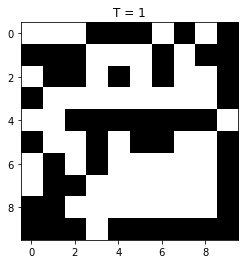

In [100]:
mags = Ising(10, 1)
mags.draw()
mags.step()

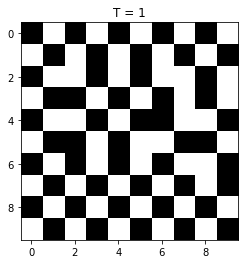

In [101]:
for i in range(100):
    mags.step()
    
mags.draw()